In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from livelossplot import PlotLossesKeras
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_train=pd.read_csv('TataGlobal_train.csv')
dataset_test=pd.read_csv('TataGlobal_test.csv')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
lookback=30
new_price=[]
for i in range(0,len(dataset_train)-lookback):
    new_price.append(dataset_train.Open[i+lookback])
for i in range(0,lookback):
    new_price.append(0)
dataset_train['New_price']=new_price

In [8]:
dataset_train.head(40)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),New_price
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,233.00
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,237.30
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,236.65
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,237.25
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,241.00
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59,235.15
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78,236.00
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70,232.50
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41,248.70
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50,243.40


In [9]:
idv=dataset_train['Open']
dv=dataset_train['New_price']

In [11]:
type(idv),type(dv)

(pandas.core.series.Series, pandas.core.series.Series)

In [12]:
idv.shape

(2035,)

In [15]:
idv=idv.to_numpy().reshape(-1,1)
dv=dv.to_numpy().reshape(-1,1)

In [16]:
idv.shape,dv.shape

((2035, 1), (2035, 1))

In [17]:
sc=MinMaxScaler(feature_range=(0,1))
idv=sc.fit_transform(idv)
dv=sc.fit_transform(dv)

In [19]:
dv=dv.reshape(-1,)

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(idv,dv,test_size=0.25,random_state=4321)

In [21]:
xtrain.shape,ytrain.shape

((1526, 1), (1526,))

In [22]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [24]:
xtrain.shape,ytrain.shape, xtrain.shape[1:]

((1526, 1, 1), (1526,), (1, 1))

In [25]:
model=Sequential()
model.add(LSTM(250,input_shape=(xtrain.shape[1:])))
model.add(Dense(1,activation='linear'))

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')

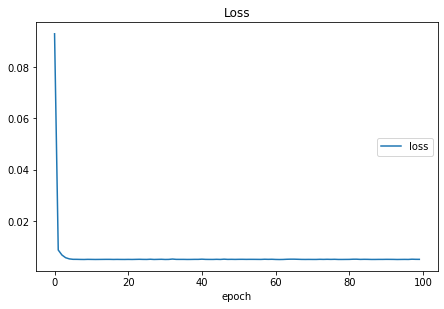

Loss
	loss             	 (min:    0.005, max:    0.093, cur:    0.005)


In [30]:
history=model.fit(xtrain,ytrain,batch_size=32,epochs=100,verbose=1,callbacks=[PlotLossesKeras()])

In [31]:
model.evaluate(xtest,ytest)

509/509 [==============================] - 0s 422us/step


0.0030267904695555244

In [60]:
predict=model.predict(xtest)

In [61]:
predict=sc.inverse_transform(predict)
#predict=predict.reshape(-1,)

In [ ]:
predict=predict.reshape(-1,)
predict

In [37]:
ytest=ytest.reshape(-1,1)

In [46]:
actual_values=sc.inverse_transform(ytest)

In [41]:
actual_values.shape

(509, 1)

In [52]:
actual_values=actual_values.reshape(-1,)

In [64]:
prediction=pd.DataFrame({'Actual':actual_values,'Predicted':predict})

In [ ]:
prediction

In [66]:
testdata=dataset_test['Open']

In [72]:
#Normalize the test data from test dataset using Mixmax scaler
testdata=testdata.to_numpy().reshape(-1,1)
testdata=sc.transform(testdata)

### predict the stock price with the test data

In [75]:
testdata=testdata.reshape(testdata.shape[0],testdata.shape[1],1)

In [76]:
predict_testdata=model.predict(testdata)

In [78]:
predicted_test_values=sc.inverse_transform(predict_testdata)

In [83]:
test_predictions=pd.DataFrame({'Actual Test Values':dataset_test['Open'],'Predicted Test Values':predicted_test_values.reshape(-1,)})

In [84]:
test_predictions

,Actual Test Values,Predicted Test Values
0,220.10,234.153915
1,221.10,234.844620
2,229.45,240.606613
3,230.30,241.192566
4,237.70,246.291626
5,237.10,245.878403
6,229.70,240.778946
7,226.25,238.399323
8,215.00,230.630157
9,215.00,230.630157
